# HW 2

## 2.1


In [5]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def ODE(alpha, beta, fun, N):
    n = N-1
    h = 1 / N
    
    A = [[0]+[N**2]*(n-1), [-2*N**2]*n, [N**2]*(n-1)+[0]]
    x = np.linspace(0, 1, N+1)
    F = fun(x[1:-1])
    F[0] -= alpha * N**2
    F[-1] -= beta * N**2
    
    v = [alpha, *la.solve_banded((1, 1), A, F), beta]
    return x, v

def set_up_graph():
    plt.rcParams.update({'font.size': 16})
    plt.xlabel("x")
    plt.ylabel("y");

def graph(alpha, beta, fun, N):
    x, v = ODE(alpha, beta, fun, N)
    plot = plt.plot(x, v)
    return plot

## 2.2

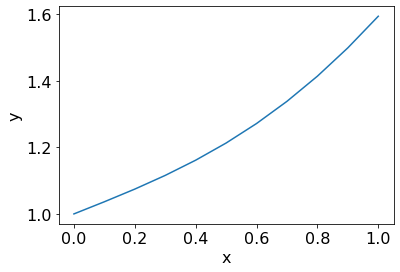

In [6]:
set_up_graph()

fun = lambda x: np.sin(np.pi*x/2)
alpha = 1
beta = 2 - 4/np.pi**2

graph(alpha, beta, fun, 10)
plt.show()

## 2.3

The true solution is
$$u(x) = x+1-\frac{4}{\pi^2}\sin\left(\frac{\pi x}{2}\right)$$

We compare the global $\infty$-norm $e^h$ against various values of $h$ in a log-log plot. Then we also plot the approximate convergence rate $p$ using the formula

$$p\approx p_i = \frac{\log(e^{h_{i+1}}) - \log(e^{h_i})}{\log(h_{i+1})-\log(h_i)}.$$

As you can see in the plots below this method has a second-order convergence rate.

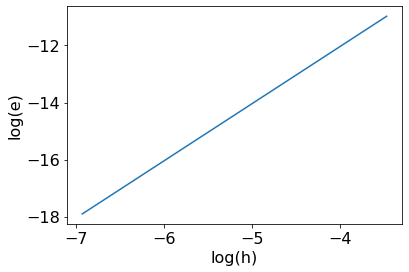

In [7]:
h = []
e = []
for j in range(5, 11):
    N = 2**j
    x, v = ODE(alpha, beta, fun, N)
    true = x + 1 - 4/np.pi**2*np.sin(np.pi*x/2)
    h.append(1/N)
    e.append(np.linalg.norm(v-true, ord=np.inf))

log_h = np.log(h)
log_e = np.log(e)
plt.plot(log_h, log_e)
plt.xlabel("log(h)")
plt.ylabel("log(e)");

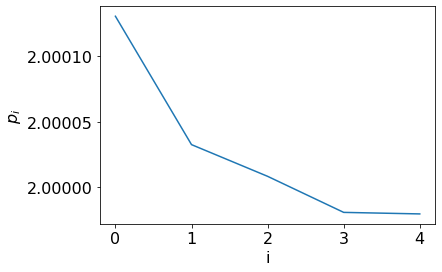

In [8]:
p = (log_e[1:]-log_e[:-1])/(log_h[1:]-log_h[:-1])
plt.plot(range(len(p)), p)
plt.xlabel("i")
plt.ylabel("$p_i$");
plt.ticklabel_format(useOffset=False)
plt.show()